In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow as imshow
import tensorflow as tf

In [2]:
def Enhanced(img):
  img = tf.constant(img, dtype=tf.float64)
  G = tf.cast(tf.linspace(0.0, 255.0, 256)[...,tf.newaxis,tf.newaxis,tf.newaxis], tf.float64)
  K = tf.constant([[-1.0,-1.0,-1.0], [-1.0,8.0,-1.0], [-1.0,-1.0,-1.0]])[...,tf.newaxis,tf.newaxis]
  K = tf.repeat(K, 3, 2)
  imgs = tf.repeat(img[tf.newaxis,...], 256, 0)
  imgs = tf.where(imgs > G, 1.0, -1.0)
  imgs = tf.nn.conv2d(imgs, K, [1, 1, 1, 1], "SAME") * imgs
  E = tf.reduce_sum(imgs, [1, 2])

  pdf = tf.math.divide_no_nan(E, tf.math.reduce_sum(E, 0, True))
  cdf = tf.math.cumsum(pdf)
  T = tf.cast(tf.round(cdf * 255), tf.int32)
  indx = tf.ones_like(img) * tf.constant([0.0,1.0,2.0], tf.float64)
  indx = tf.cast(tf.stack([img, indx], -1), tf.int32)
  return tf.gather_nd(T, indx).numpy()

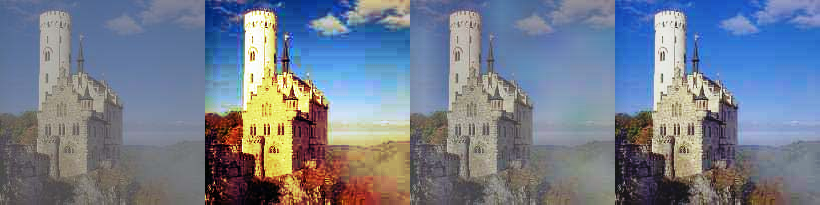

In [3]:
img = cv2.imread('image-007.jpg')

he = np.empty_like(img)
for i in range(3):
    he[:,:,i] = cv2.equalizeHist(img[:,:,i])
  
clahe = np.empty_like(img)
for i in range(3):
    clahe[:,:,i] = cv2.createCLAHE(clipLimit = 1).apply(img[:,:,i])

ours = Enhanced(img)

imshow(np.hstack([img, he, clahe, ours]))